# Counts the reads mapping to NMD isoforms vs non-NMD isoforms and plot the results, take II

In [14]:
library(ggplot2)

# To unpack the data, run the notebook create_NMD_figures.ipynb

In [15]:
dataDir='data/'

In [16]:
metadata.file.name    = paste0(dataDir, "srr_pdata.csv")
file.exists(metadata.file.name)

inc.counts.file.name  = paste0(dataDir, "rmats_final.se.jc.ijc.txt.gz")
file.exists(inc.counts.file.name)

skip.counts.file.name <- paste0(dataDir, "rmats_final.se.jc.sjc.txt.gz")
file.exists(skip.counts.file.name)

[1] TRUE

[1] TRUE

[1] TRUE

In [17]:
meta.data = readr::read_csv(metadata.file.name)
dim(meta.data)

inc.counts   = as.data.frame(data.table::fread(inc.counts.file.name))
dim(inc.counts)

skip.counts  = as.data.frame(data.table::fread(skip.counts.file.name))
dim(skip.counts)

nmd.tab = read.table('data/NMD_summary.txt',sep='\t')

Parsed with column specification:
cols(
  .default = col_double(),
  SAMPID = col_character(),
  SMATSSCR = col_character(),
  SMCENTER = col_character(),
  SMPTHNTS = col_character(),
  SMTS = col_character(),
  SMTSD = col_character(),
  SMUBRID = col_character(),
  SMNABTCH = col_character(),
  SMNABTCHT = col_character(),
  SMNABTCHD = col_character(),
  SMGEBTCH = col_character(),
  SMGEBTCHD = col_character(),
  SMGEBTCHT = col_character(),
  SMAFRZE = col_character(),
  SMGTC = col_logical(),
  SMNUMGPS = col_logical(),
  SM550NRM = col_logical(),
  SM350NRM = col_logical(),
  SMMNCPB = col_logical(),
  SMMNCV = col_logical()
  # ... with 6 more columns
)

See spec(...) for full column specifications.



[1] 7872   68

[1] 42611  8674

[1] 42611  8674

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 15 did not have 3 elements


# Create a data frame with counts for each tissue and generate a boxplot for it

[1] TRUE

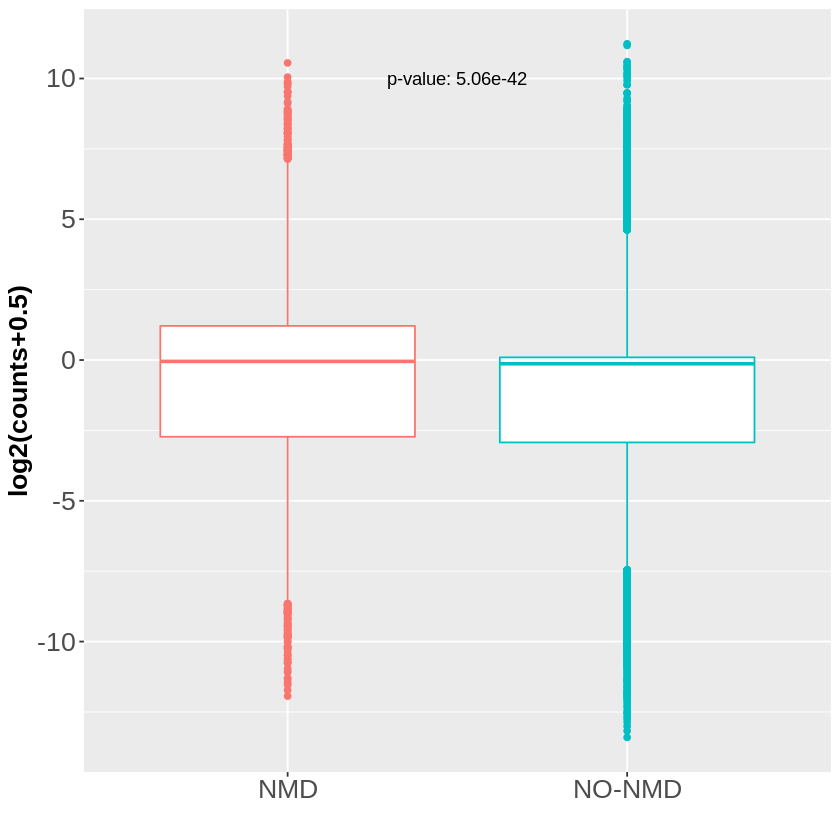

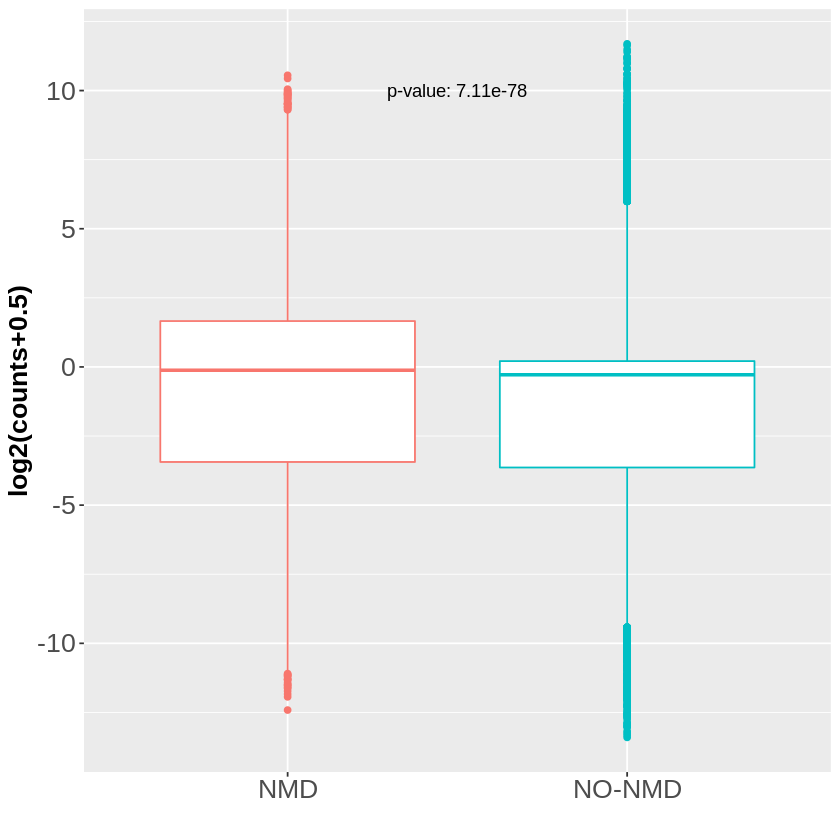

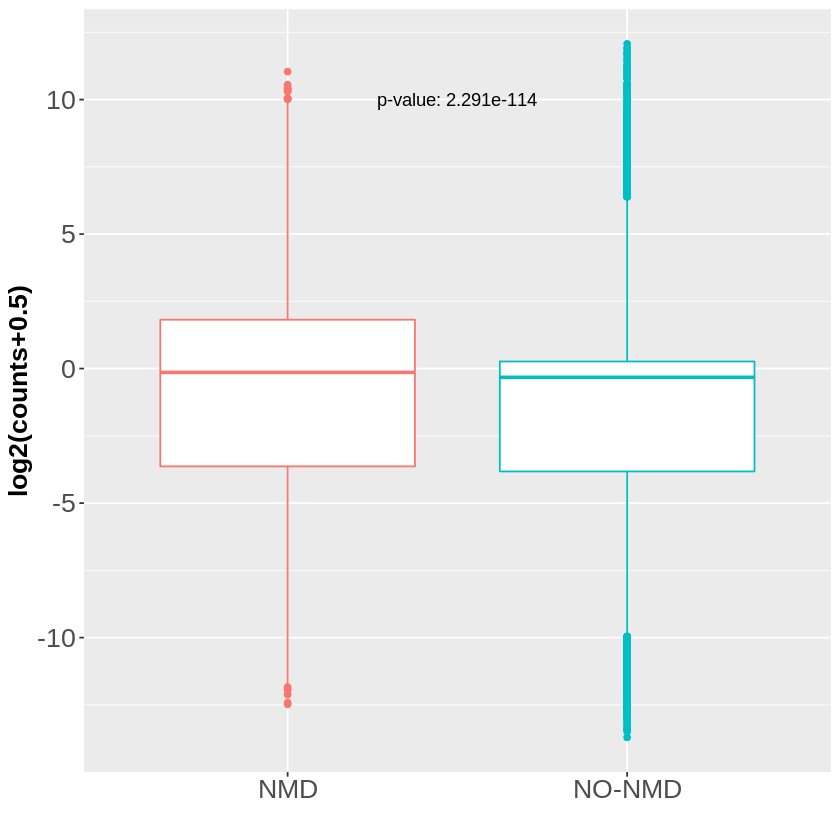

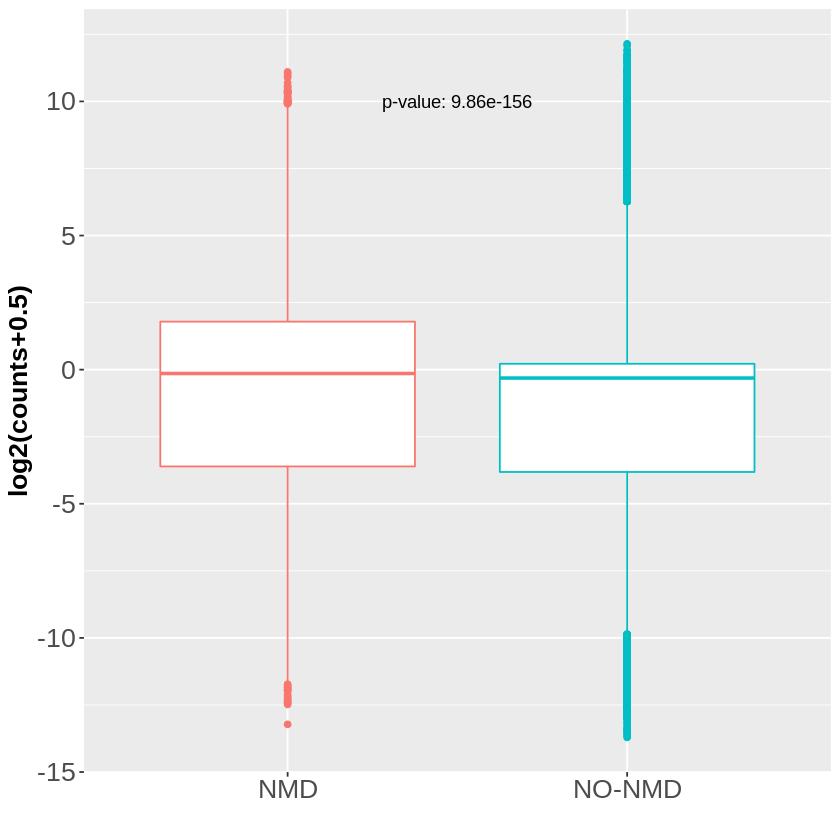

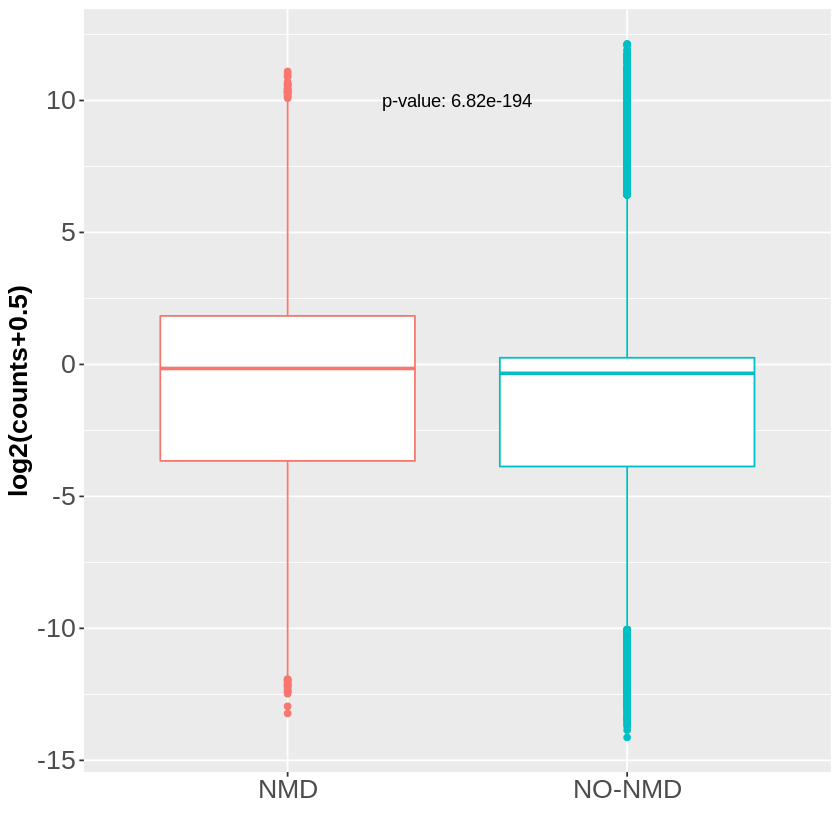

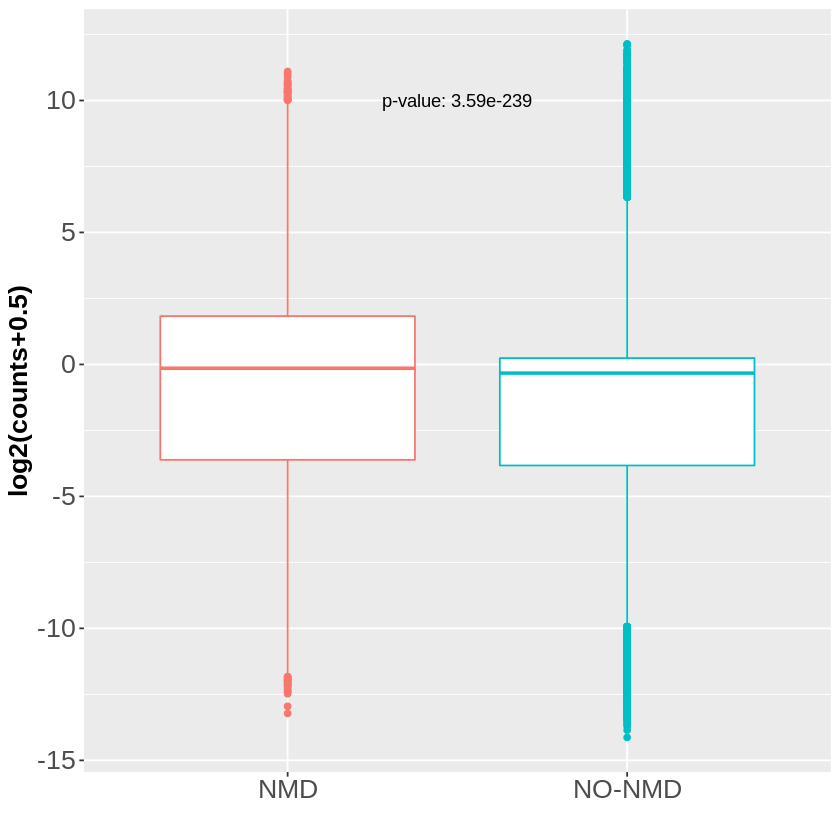

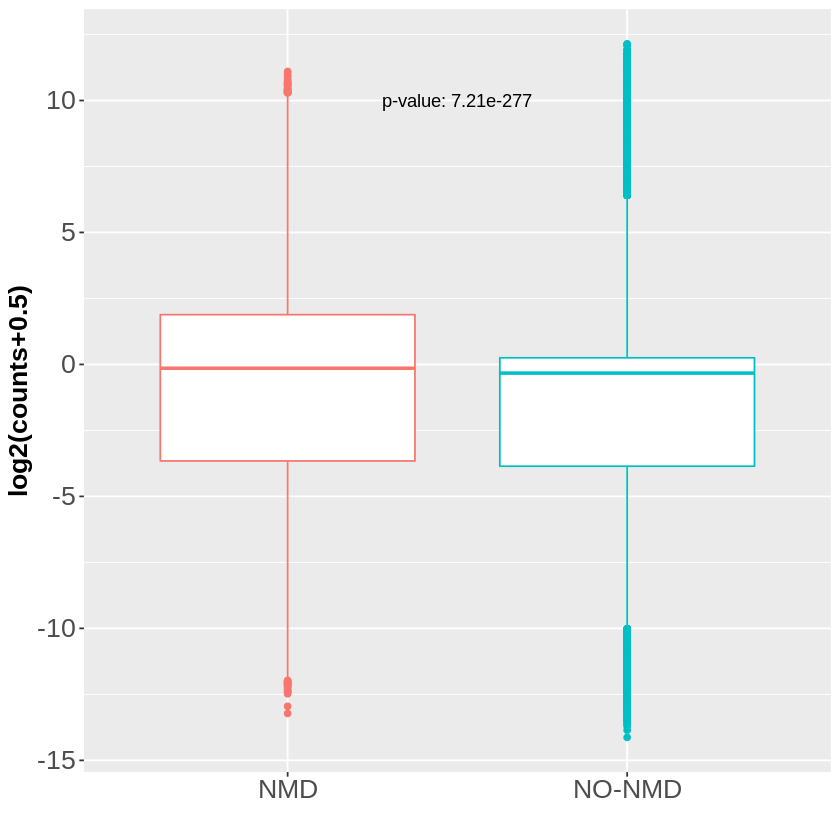

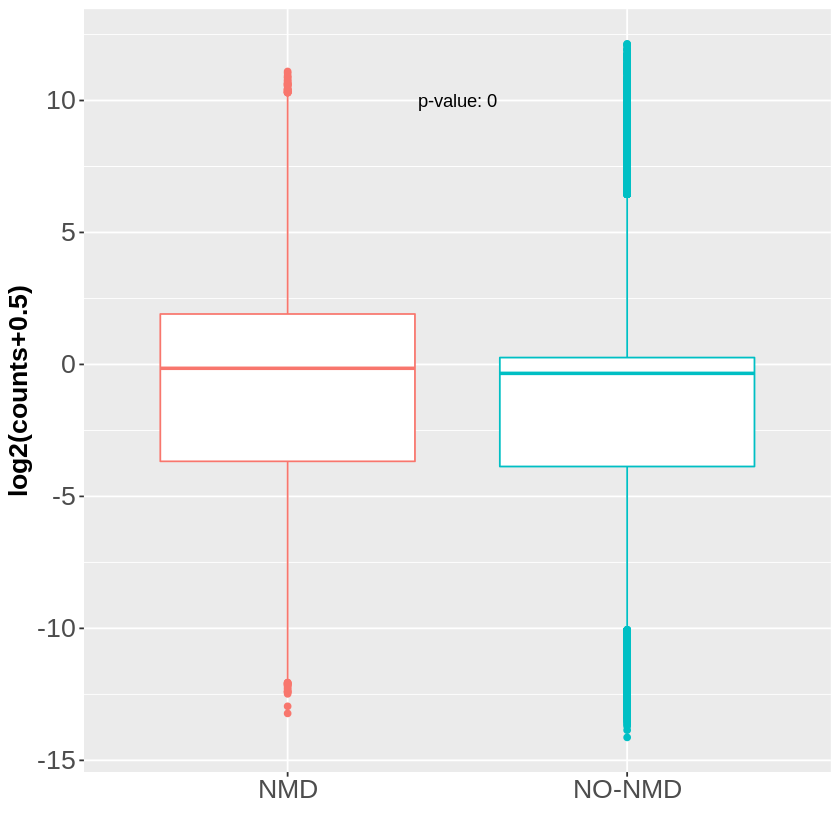

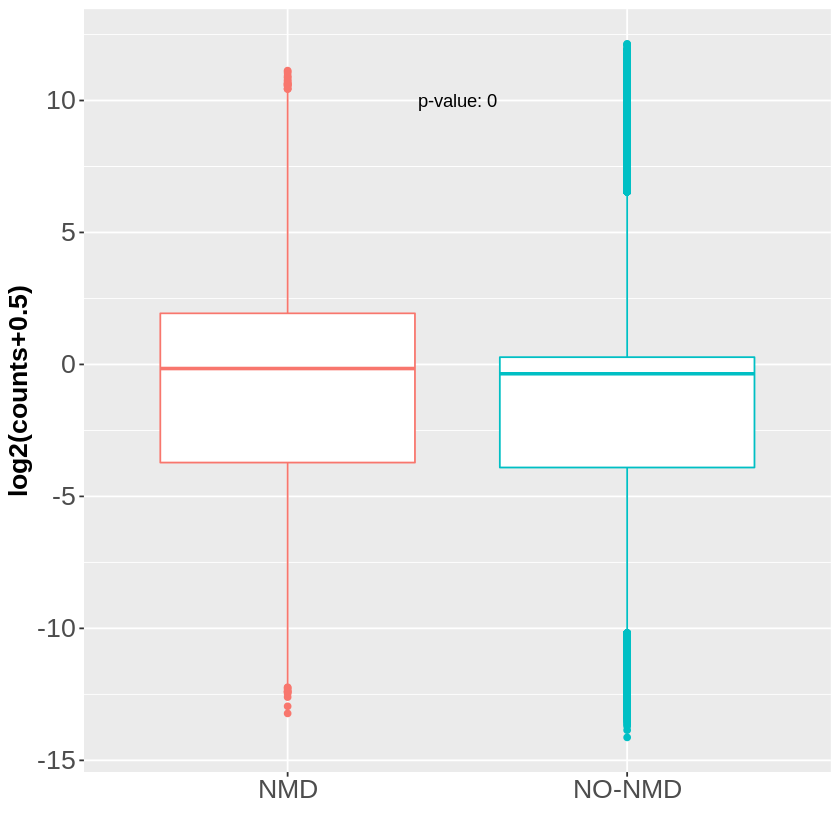

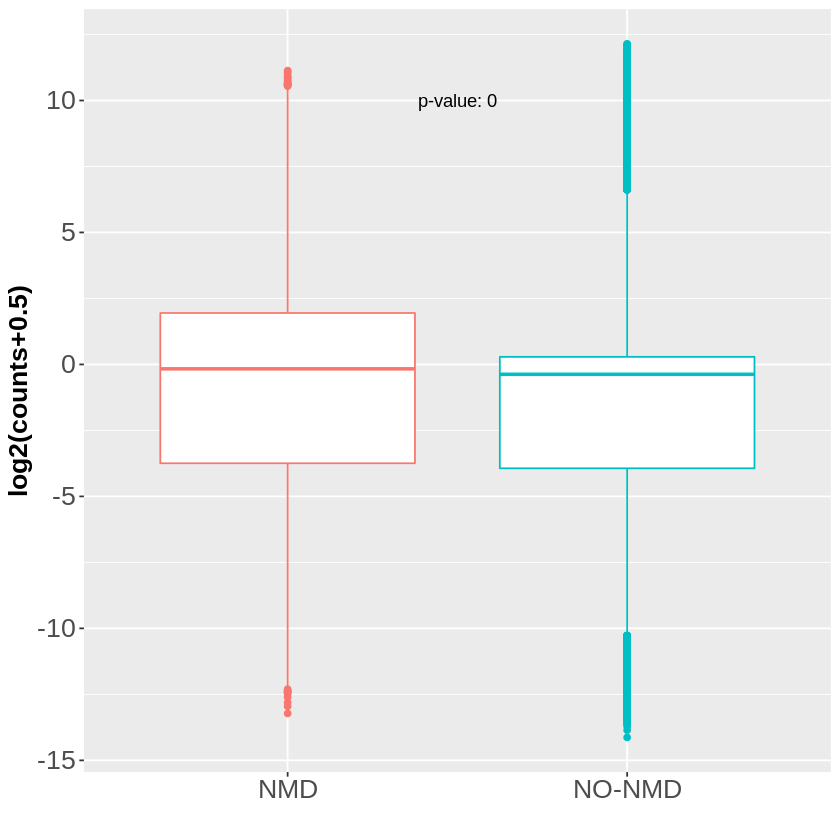

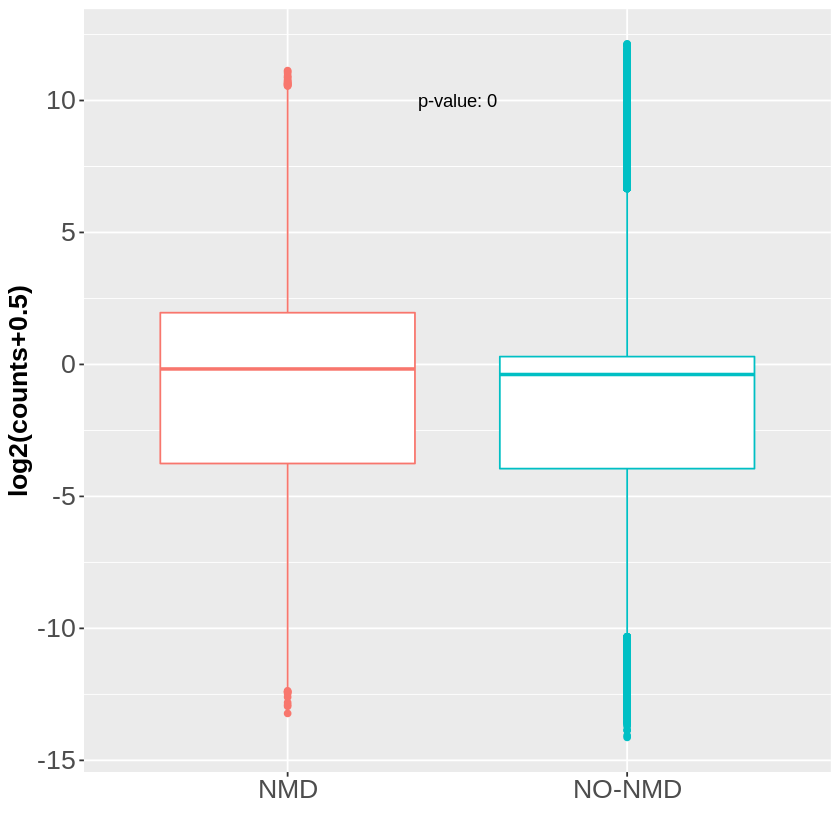

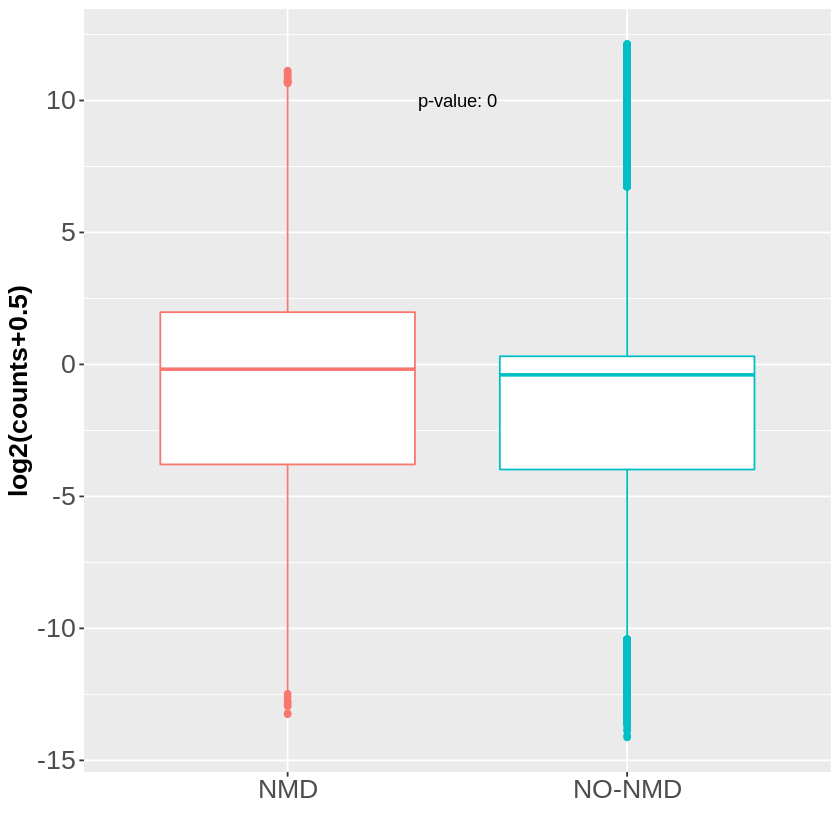

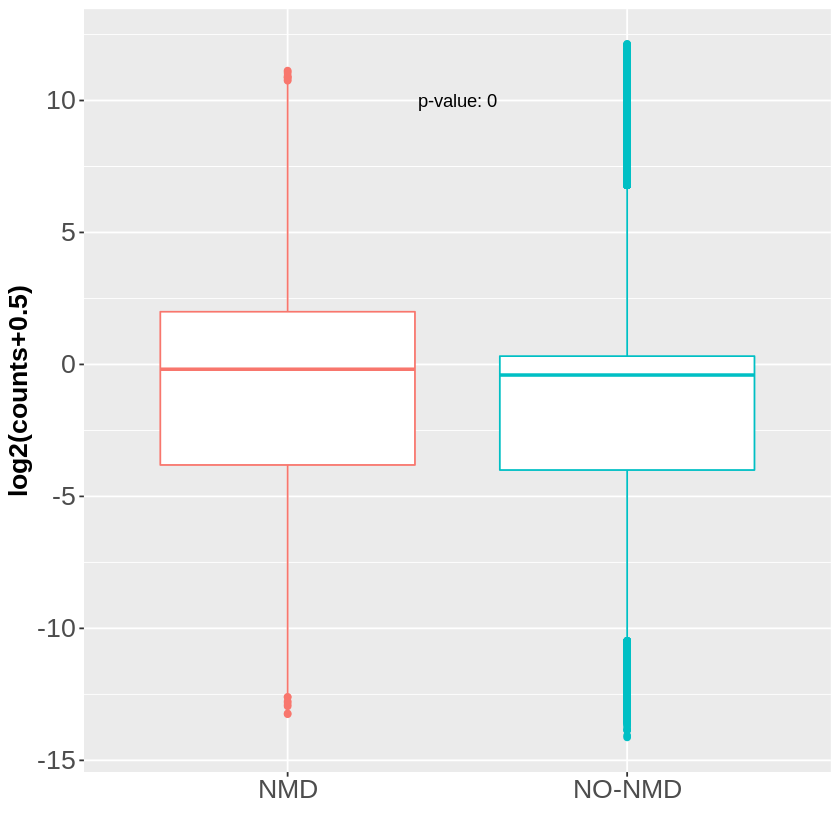

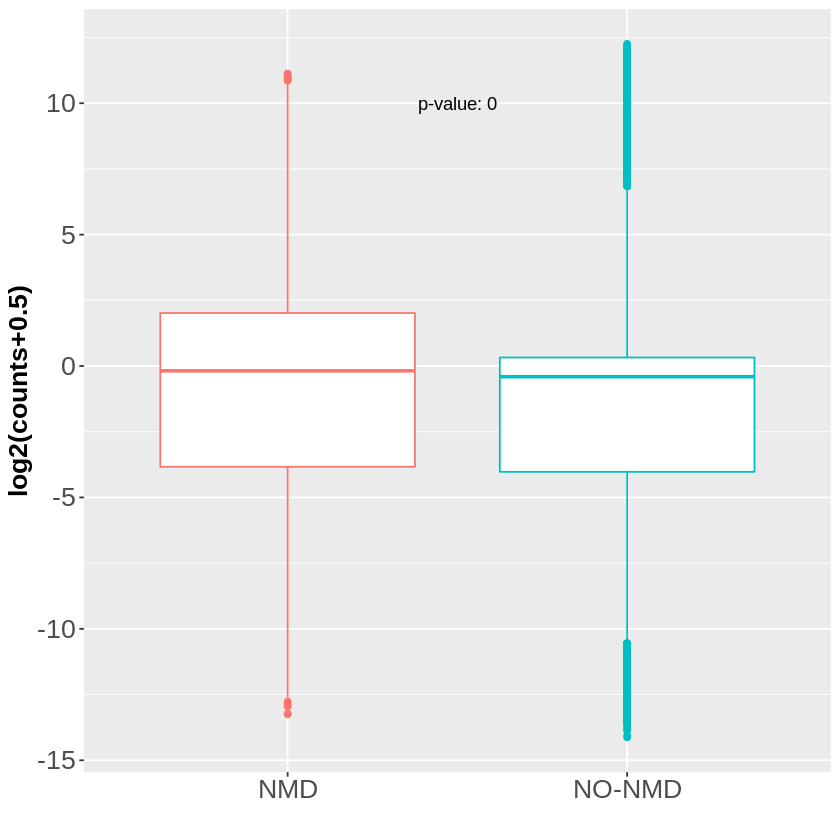

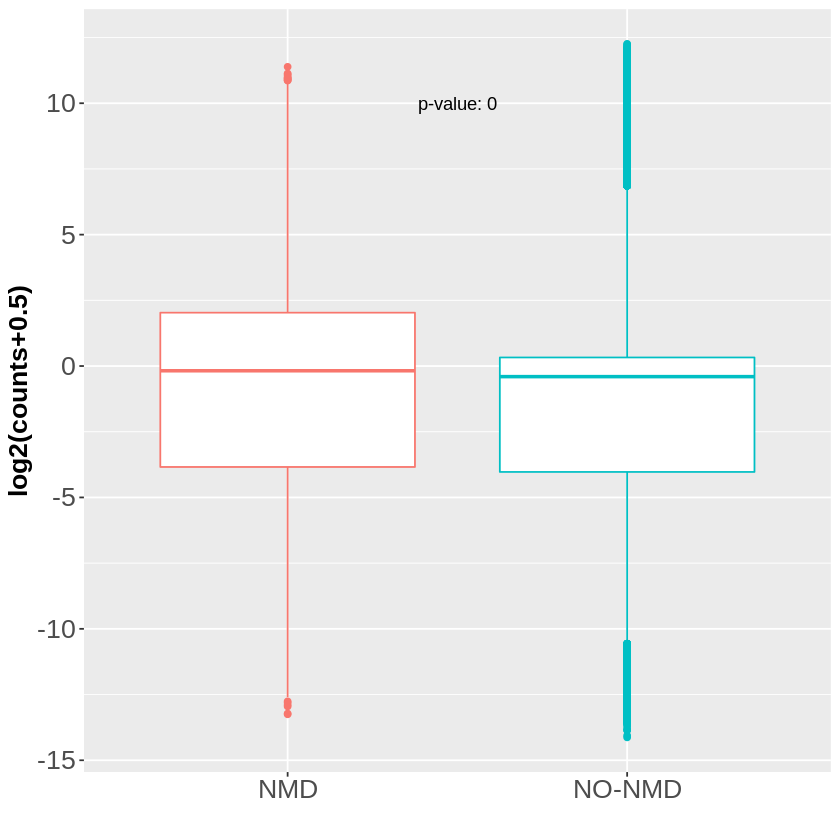

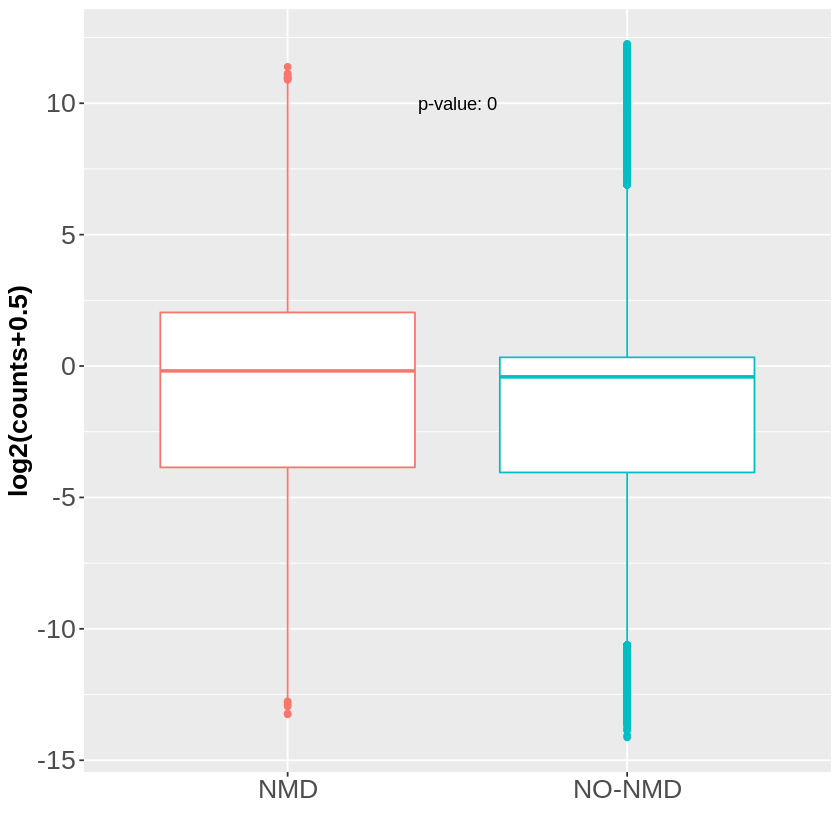

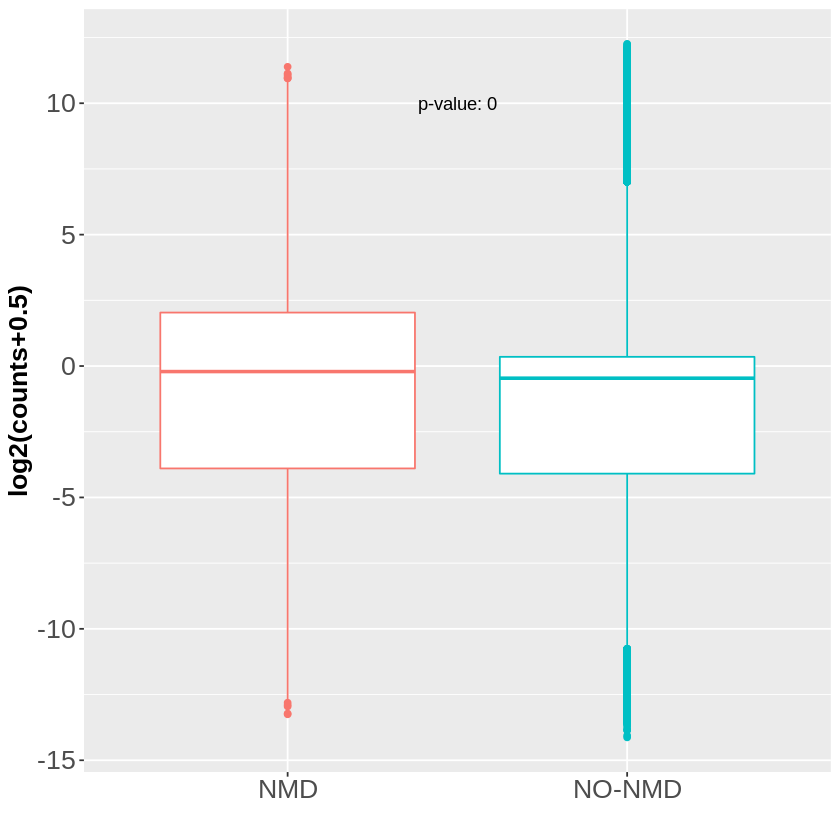

In [ ]:
sum(colnames(inc.counts)==colnames(skip.counts))==ncol(skip.counts)

meta.data[["SMTSD"]] = as.character(meta.data[["SMTSD"]])

df<-data.frame()

for (tissue in unique(snakecase::to_snake_case(meta.data$SMTSD)))
{
    
    
    tissue.meta.data <- meta.data[ snakecase::to_snake_case(meta.data$SMTSD) == tissue,]
    
    skip.inc.count.ratio=log2(skip.counts[,colnames(skip.counts) %in% tissue.meta.data$SRR]+0.5)-
    
                        log2(inc.counts[,colnames(inc.counts) %in% tissue.meta.data$SRR]+0.5)
    
    
    df<-rbind(df,data.frame(type=c(ifelse(as.numeric(nmd.tab$num.nmd)>0,'NMD','NO-NMD')),
                            
                            log2counts=c(rowMeans(skip.inc.count.ratio))))

    
    pval<-wilcox.test(df$log2counts[df$type=='NMD'],df$log2counts[df$type=='NO-NMD'],paired=F)$p.value
  
    p <- ggplot(df, aes(x=type, y=log2counts,color=type)) + geom_boxplot()+theme(plot.title = element_text(hjust = 0.5))+ylab('log2(counts+0.5)')+xlab('')+
    theme(axis.text=element_text(size=16), axis.title=element_text(size=16,face="bold"))+ theme(legend.position="none")+
    annotate("text", x=1.5, y=10, label= paste0("p-value: ",round(pval,-log10(pval)+3))) 

    plot(p) 
}
    
    